<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 주택가격 데이터 불러오기
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
'python-machine-learning-book-2nd-edition'
'/master/code/ch10/housing.data.txt', header = None, sep = '\s+')

df.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
            'PRTATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# 회귀에 규제적용
ridge & lasso

In [0]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1.0) # alpha = lmabda(규제강도)

In [0]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1.0)

In [0]:
# L1과 L2의 비율조절
from sklearn.linear_model import ElasticNet

elanet = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
# l1_ratio = 0.5는 lasso회귀와 동일

# 선형회귀를 다항회귀로 전환

In [0]:
# 2차 다항식 추가
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 369.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree = 2) #2차식
X_quad = quadratic.fit_transform(X)

lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [0]:
# 훈련
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

No handles with labels found to put in legend.


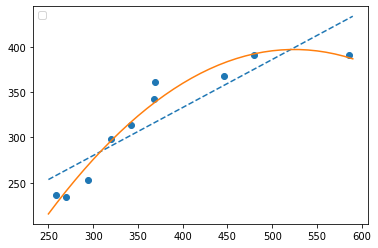

In [0]:
# 결과 그래프
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X_fit, y_lin_fit, linestyle = '--')
plt.plot(X_fit, y_quad_fit)
plt.legend(loc = 'upper left')
plt.show()

In [0]:
# 주택 데이터셋을 이용
from sklearn.metrics import r2_score
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

No handles with labels found to put in legend.


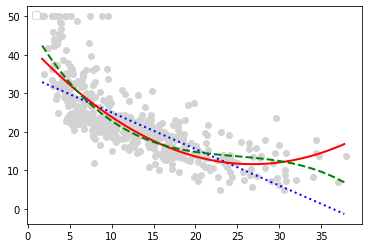

In [0]:
#graph
plt.scatter(X, y, color = 'lightgray')
plt.plot(X_fit, y_lin_fit, color = 'blue', lw = 2, linestyle = ':')
plt.plot(X_fit, y_quad_fit, color = 'red', lw = 2, linestyle = '-')
plt.plot(X_fit, y_cubic_fit, color = 'green', lw = 2, linestyle = '--')
plt.legend(loc = 'upper left')
plt.show()

In [0]:
print(linear_r2, quadratic_r2, cubic_r2)

0.5441462975864797 0.6407168971636612 0.6578476405895719


# random forest를 이용한 비선형다루기


In [0]:
# 산점도와 회귀직선을 그려줌

def lin_regplot(X, y, model):
  plt.scatter(X, y, c = 'steelblue', edgecolor = 'white', s = 70)
  plt.plot(X, model.predict(X), color = 'black', lw = 2)
  return None

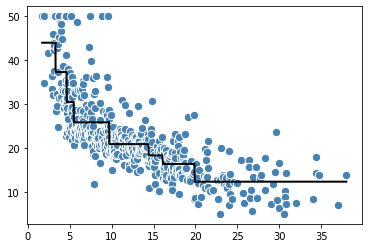

In [0]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth = 3) # 깊이가 깊을수록 과대적합상승
tree.fit(X, y)
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest = RandomForestRegressor(n_estimators = 1000, criterion = 'mse', random_state = 1, n_jobs = -1)
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred))
print(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

1.6414409895378974 11.055753098768493
0.9794899516412922 0.8775836858654068


No handles with labels found to put in legend.


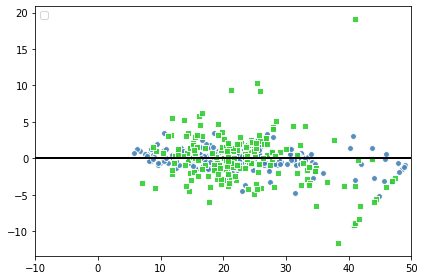

In [0]:
# 잔차 그림
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'steelblue', edgecolor = 'white', marker = 'o',
            s = 35, alpha = 0.9)
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'limegreen', edgecolor = 'white', marker = 's', s =35,
            alpha = 0.9)
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color ='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()